# Model Training for ZoneTemperature

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump

### Read Data

In [10]:
data_pathway = "data/seb/UnitStatus(Date_and_Wkday)_ZoneTemperature_processed_data_labeled.csv"
df = pd.read_csv(data_pathway, header = 0, index_col = False)

# display (rows, columns)
df.shape

(9216, 29)

In [14]:
y = df["Label"]
X = df.drop(columns=["Attr", "Date","Weekday", "Summer", "Label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Columns for Training Dataset

In [15]:
X.columns

Index(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

### DecisionTreeClassifier

0.8459869848156182
                 precision    recall  f1-score   support

Gradual Cooling       0.84      0.83      0.83       395
  High-Low-High       0.85      0.84      0.85       662
Highly Variable       0.81      0.82      0.82       368
   Low-High-Low       0.89      0.88      0.89       399
   Sudden Spike       0.82      0.90      0.86        20

       accuracy                           0.85      1844
      macro avg       0.84      0.86      0.85      1844
   weighted avg       0.85      0.85      0.85      1844



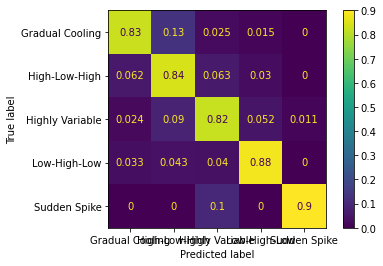

In [16]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(tree, X_test, y_test, normalize="true");

## Random Forest

0.9311279826464208
                 precision    recall  f1-score   support

Gradual Cooling       0.96      0.90      0.93       395
  High-Low-High       0.91      0.94      0.93       662
Highly Variable       0.93      0.90      0.91       368
   Low-High-Low       0.93      0.97      0.95       399
   Sudden Spike       1.00      0.90      0.95        20

       accuracy                           0.93      1844
      macro avg       0.95      0.92      0.93      1844
   weighted avg       0.93      0.93      0.93      1844



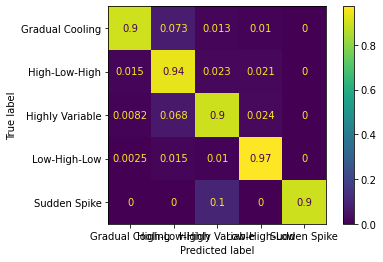

In [20]:
rand_tree = RandomForestClassifier()
rand_tree.fit(X_train, y_train)
y_pred = rand_tree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rand_tree, X_test, y_test, normalize="true");

### Export Model

In [23]:
dump(tree, 'zone_temperature_model.joblib')

['zone_temperature_model.joblib']